In [2]:
using Pkg, Revise
Pkg.activate("..")
using GenLinAlgProblems, LinearAlgebra, RowEchelon, Latexify, SymPy, Random

using PyCall
itikz = pyimport("itikz")
nM    = pyimport("itikz.nicematrix")

using SymPy

Random.seed!(113312);

  Activating project at `C:\Users\jeff\NOTEBOOKS\elementary-linear-algebra\GenLinAlgProblems`


# 1. NumPy and Latex Representations and Rounding

In [2]:
# Print out a definition of an integer array for use with numpy
A = [ 1 2 1; -1 1 2]
print_np_array_def(A)

A = np.array([
[ 1, 2, 1],
[ -1, 1, 2],
])


In [3]:
matrices=[[ [1 2; 2 1], :none], [:none]]
latexify( apply_function( x -> x^2, matrices))

L"$\left[
\begin{array}{c}
\left[
\begin{array}{c}
\left[
\begin{array}{cc}
1 & 4 \\
4 & 1 \\
\end{array}
\right] \\
none \\
\end{array}
\right] \\
\left[
\begin{array}{c}
none \\
\end{array}
\right] \\
\end{array}
\right]$"

In [4]:
matrices = [ [[1 2; 2 1], [1//1 2; (-3)//5 -1]], [["alpha" "b"], [1.1 π] ] ]
apply_function( x->to_latex(x), matrices )

2-element Vector{Vector}:
 [["1" "2"; "2" "1"], ["1" "2"; "-\\frac{3}{5}" "-1"]]
 Matrix[LaTeXStrings.LaTeXString[L"$alpha$" L"$b$"], ["1.1" "3.141592653589793"]]

In [5]:
to_latex( -1//2), to_latex(2+1//2im)

("-\\frac{1}{2}", "2 - \\frac{1}{2}\\mathit{i}")

In [6]:
factor_out_denominator( [1//2 1//3; 2//1 1//(-3) ])

(6, [3 2; 12 -2])

In [7]:
round_value( 2.3, 0), round_value(1//3, 3), round_value( Complex(1//3, -1//5),0), round_value( Complex(1//3, -1//5), 1), round_value( Complex(0, -1//5), 1)

(2, 0.333, 0 + 0im, 0.3 - 0.2im, 0.0 - 0.2im)

In [8]:
res = round_value( Complex(0,-1//5), 1)
to_latex(res)

"-0.2\\mathit{i}"

In [9]:
matrices = [ [[1 2; 2 1], [1//1 2; (-3)//5 -1]] ]
stack = apply_function( x->Complex(x+1//3, 1//5), matrices)
latexify( round_matrices(stack,1) )

L"\begin{equation}
\left[
\begin{array}{c}
\left[
\begin{array}{c}
\left[
\begin{array}{cc}
1.3+0.2\mathit{i} & 2.3+0.2\mathit{i} \\
2.3+0.2\mathit{i} & 1.3+0.2\mathit{i} \\
\end{array}
\right] \\
\left[
\begin{array}{cc}
1.3+0.2\mathit{i} & 2.3+0.2\mathit{i} \\
-0.3+0.2\mathit{i} & -0.7+0.2\mathit{i} \\
\end{array}
\right] \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [10]:
m=latexify(stack[1][1])
println(m)
m

\begin{equation}
\left[
\begin{array}{cc}
\frac{4}{3}+\frac{1}{5}\mathit{i} & \frac{7}{3}+\frac{1}{5}\mathit{i} \\
\frac{7}{3}+\frac{1}{5}\mathit{i} & \frac{4}{3}+\frac{1}{5}\mathit{i} \\
\end{array}
\right]
\end{equation}



L"\begin{equation}
\left[
\begin{array}{cc}
\frac{4}{3}+\frac{1}{5}\mathit{i} & \frac{7}{3}+\frac{1}{5}\mathit{i} \\
\frac{7}{3}+\frac{1}{5}\mathit{i} & \frac{4}{3}+\frac{1}{5}\mathit{i} \\
\end{array}
\right]
\end{equation}
"

# 2. GE, GJ Type Problems

## 2.1. Generate Different Type of Matrices

In [11]:
# unit lower triangular matrix
Random.seed!(3)
latexify(unit_lower(3,4; maxint=4))

L"\begin{equation}
\left[
\begin{array}{cccc}
1 & 0 & 0 & 0 \\
-1 & 1 & 0 & 0 \\
4 & 4 & 1 & 0 \\
\end{array}
\right]
\end{equation}
"

In [12]:
# lower triangilar matrix
Random.seed!(23)
latexify(lower(3))

L"\begin{equation}
\left[
\begin{array}{ccc}
-3 & 0 & 0 \\
1 & 1 & 0 \\
1 & 2 & 3 \\
\end{array}
\right]
\end{equation}
"

In [13]:
# reduced row echelon form matrix of given rank, with and without zero values to the right of pivots
Random.seed!(13221)
mat,pivot_cols = rref_matrix(4,10,3; maxint=5, pivot_in_first_col=false, has_zeros=false)
println("pivotcols, $pivot_cols")
latexify( mat )

pivotcols, [2, 6, 9]


L"\begin{equation}
\left[
\begin{array}{cccccccccc}
0 & 1 & -5 & -2 & 5 & 0 & -4 & -5 & 0 & -2 \\
0 & 0 & 0 & 0 & 0 & 1 & -3 & -5 & 0 & 4 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 3 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{array}
\right]
\end{equation}
"

In [14]:
Random.seed!(1212)
latexify(symmetric_matrix(4;maxint=9, with_zeros=true))

L"\begin{equation}
\left[
\begin{array}{cccc}
7 & -1 & -2 & 7 \\
-1 & -4 & -4 & -4 \\
-2 & -4 & -7 & 0 \\
7 & -4 & 0 & -5 \\
\end{array}
\right]
\end{equation}
"

In [15]:
Random.seed!(1212)
latexify(skew_symmetric_matrix(4;maxint=9, with_zeros=true))

L"\begin{equation}
\left[
\begin{array}{cccc}
0 & 1 & 2 & -7 \\
-1 & 0 & 4 & 4 \\
-2 & -4 & 0 & 0 \\
7 & -4 & 0 & 0 \\
\end{array}
\right]
\end{equation}
"

In [16]:
Random.seed!(44372)
latexify(i_with_onecol(6, 2; maxint=9, with_zeros=true ))

L"\begin{equation}
\left[
\begin{array}{cccccc}
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & -9 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 0 & 1 & 0 \\
0 & -3 & 0 & 0 & 0 & 1 \\
\end{array}
\right]
\end{equation}
"

In [17]:
Random.seed!(44372)
latexify(i_with_onecol(6, 3; maxint=9, with_zeros=false,upper=false ))

L"\begin{equation}
\left[
\begin{array}{cccccc}
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & -9 & 1 & 0 & 0 \\
0 & 0 & -1 & 0 & 1 & 0 \\
0 & 0 & 2 & 0 & 0 & 1 \\
\end{array}
\right]
\end{equation}
"

In [18]:
Random.seed!(44372)
latexify(i_with_onecol(6, 4; maxint=9, with_zeros=false,lower=false ))

L"\begin{equation}
\left[
\begin{array}{cccccc}
1 & 0 & 0 & -9 & 0 & 0 \\
0 & 1 & 0 & -1 & 0 & 0 \\
0 & 0 & 1 & 2 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
\end{array}
\right]
\end{equation}
"

## 2.2 Generating GE and GJ Type Problems

In [19]:
Random.seed!(416)
pivot_cols,A = gen_gj_matrix(5,4,2;maxint=2,pivot_in_first_col=true, has_zeros=true)
latexify([pivot_cols',A])

L"$\left[
\begin{array}{c}
\left[
\begin{array}{cc}
1 & 3 \\
\end{array}
\right] \\
\left[
\begin{array}{cccc}
2 & 2 & 4 & -3 \\
-2 & -2 & -6 & 4 \\
-4 & -4 & -4 & 4 \\
0 & 0 & 2 & -1 \\
4 & 4 & 10 & -7 \\
\end{array}
\right] \\
\end{array}
\right]$"

In [20]:
X,B=gen_rhs(A,pivot_cols; maxint=2,num_rhs=2,has_zeros=false)
latexify( [A', X', B']')

L"$\left[
\begin{array}{ccc}
\left[
\begin{array}{cccc}
2 & 2 & 4 & -3 \\
-2 & -2 & -6 & 4 \\
-4 & -4 & -4 & 4 \\
0 & 0 & 2 & -1 \\
4 & 4 & 10 & -7 \\
\end{array}
\right] & \left[
\begin{array}{cc}
2 & -2 \\
0 & 0 \\
-1 & 2 \\
0 & 0 \\
\end{array}
\right] & \left[
\begin{array}{cc}
0 & 4 \\
2 & -8 \\
-4 & 0 \\
-2 & 4 \\
-2 & 12 \\
\end{array}
\right] \\
\end{array}
\right]$"

In [21]:
Random.seed!(41283)
A,X,B=gen_gj_pb(3,6,2; maxint=2, pivot_in_first_col=false, num_rhs=2,has_zeros=false)
latexify( [ [A B]', X']')

L"$\left[
\begin{array}{cc}
\left[
\begin{array}{cccccccc}
0 & 1 & -2 & 2 & 3 & 1 & 3 & 0 \\
0 & -2 & 3 & -2 & -5 & -1 & -5 & 1 \\
0 & 2 & -4 & 4 & 6 & 2 & 6 & 0 \\
\end{array}
\right] & \left[
\begin{array}{cc}
0 & 0 \\
1 & -2 \\
-1 & -1 \\
0 & 0 \\
0 & 0 \\
0 & 0 \\
\end{array}
\right] \\
\end{array}
\right]$"

In [22]:
Random.seed!(41299)
pivot_cols,L,U,A=gen_lu_pb(4,6,3)
latexify( [pivot_cols', A ])

L"$\left[
\begin{array}{c}
\left[
\begin{array}{ccc}
1 & 2 & 4 \\
\end{array}
\right] \\
\left[
\begin{array}{cccccc}
-1 & -1 & 2 & 2 & 0 & -2 \\
1 & 4 & -8 & -8 & -12 & 5 \\
-3 & -3 & 6 & 5 & 4 & -8 \\
2 & 8 & -16 & -15 & -28 & 12 \\
\end{array}
\right] \\
\end{array}
\right]$"

In [3]:
Random.seed!(41299)
pivot_cols,P,L,U,A=gen_plu_pb(5,7,3)
latexify( [[pivot_cols', A]', P', L', U' ]')

"\\begin{equation}\n\\left[\n\\begin{array}{cccc}\n\\left[\n\\begin{array}{c}\n\\left[\n\\begin{array}{ccc}\n1 & 2 & 4 \\\\\n\\end{array}\n\\right] \\\\\n\\left[\n\\begin{array}{ccccccc}\n2 & 2 & -4 & -6 & 6 & 0 & 4 \\\\\n2 & 2 & -4 & -6 & 6 & 0 & 4 \\\\\n4 & 4 & -8 & -12 & 12 & 0 & 8 \\\\\n0 & 0 & 0 & 1 & " ⋯ 373 bytes ⋯ "3 & 1 \\\\\n\\end{array}\n\\right] & \\left[\n\\begin{array}{ccccccc}\n2 & 2 & -4 & -6 & 6 & 0 & 4 \\\\\n0 & 1 & 1 & 0 & -4 & -2 & 2 \\\\\n0 & 0 & 0 & 1 & 3 & -2 & -2 \\\\\n0 & 0 & 0 & 0 & 0 & 0 & 0 \\\\\n0 & 0 & 0 & 0 & 0 & 0 & 0 \\\\\n\\end{array}\n\\right] \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

## 2.3 GE,GJ Solvers

#### <strong>GJ Problem</strong>

Reverting Windows console CPs to (in,out) = (437,437)


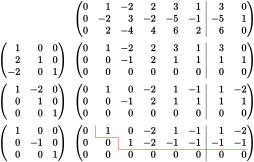

In [24]:
Random.seed!(41283)
A,X,B = gen_gj_pb(3,6,2; maxint=2, pivot_in_first_col=false, num_rhs=2,has_zeros=false)
matrices, pivot_cols = reduce_to_ref( [A B], gj=true )

pivot_locs    = [(i-1,Int64(pivot_cols[i]-1)) for i in eachindex(pivot_cols)]
ref_path_list = [ [length(matrices)-1, 1, pivot_locs, "vh","red"] ]

h,m=nM.ge( to_latex(matrices), formater=x->x, Nrhs=size(B,2),
     ref_path_list = ref_path_list, tmp_dir="../../tmp")
h

In [25]:
_,_, desc = reduce_to_ref( [A B], gj=true )
desc

9-element Vector{Any}:
 GenLinAlgProblems.FoundPivot(0, 1, 1, 2, 1, [2])
 GenLinAlgProblems.RequireElimination(0, true, true, 1, 2, 1, [2])
 GenLinAlgProblems.DoElimination(1, 1, 2, true)
 GenLinAlgProblems.FoundPivot(1, 2, 2, 3, 2, [2, 3])
 GenLinAlgProblems.RequireElimination(1, true, true, 2, 3, 2, [2, 3])
 GenLinAlgProblems.DoElimination(2, 2, 3, true)
 GenLinAlgProblems.RequireScaling(2, [2, 3])
 GenLinAlgProblems.DoScaling(3)
 GenLinAlgProblems.Finished(3, [2, 3])

##### GJ problem details

In [26]:
println("Pivot Cols: $pivot_cols" )
RB  = matrices[end][end]
# R = RB[:,1:size(A,2)]; RHS=RB[:,size(A,2)+1:end]
println( "Particular Solution, aka X")
X_p = Int.( particular_solution( RB, size(B,2), pivot_cols) )

Pivot Cols: [2, 3]
Particular Solution, aka X


6×2 Matrix{Int64}:
  0   0
  1  -2
 -1  -1
  0   0
  0   0
  0   0

In [27]:
println("Homogeneous Solution")
X_h = homogeneous_solutions( RB[:,1:size(A,2)], pivot_cols)

Homogeneous Solution


6×4 Matrix{Int64}:
 1  0   0  0
 0  2  -1  1
 0  2   1  1
 0  1   0  0
 0  0   1  0
 0  0   0  1

In [28]:
println("Particular Solution")
X

Particular Solution


6×2 Matrix{Int64}:
  0   0
  1  -2
 -1  -1
  0   0
  0   0
  0   0

In [29]:
to_latex(matrices)

4-element Vector{Vector}:
 Any[:none, ["0" "1" … "3" "0"; "0" "-2" … "-5" "1"; "0" "2" … "6" "0"]]
 [["1" "0" "0"; "2" "1" "0"; "-2" "0" "1"], ["0" "1" … "3" "0"; "0" "0" … "1" "1"; "0" "0" … "0" "0"]]
 [["1" "-2" "0"; "0" "1" "0"; "0" "0" "1"], ["0" "1" … "1" "-2"; "0" "0" … "1" "1"; "0" "0" … "0" "0"]]
 [["1" "0" "0"; "0" "-1" "0"; "0" "0" "1"], ["0" "1" … "1" "-2"; "0" "0" … "-1" "-1"; "0" "0" … "0" "0"]]

#### <strong>Inverse Problem</strong>

Reverting Windows console CPs to (in,out) = (437,437)


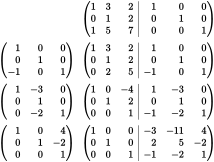

In [30]:
A, A_inv              = gen_inv_pb(3, maxint=3)
matrices, pivot_cols, _ = reduce_to_ref( Rational{Int64}.([A 1I]), gj=true)

h,m=nM.ge( to_latex(matrices), formater=x->x, Nrhs=size(A,1), tmp_dir="../../tmp" )
h

#### **LU problem**

Reverting Windows console CPs to (in,out) = (437,437)


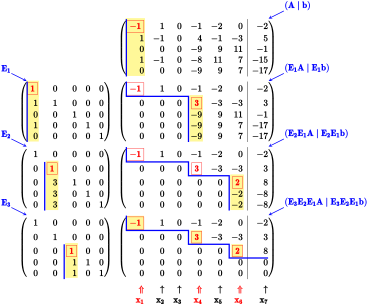

In [31]:
Random.seed!(5003)

pivot_cols, L,U, A = gen_lu_pb(5,7,3, maxint=3)
matrices,pivot_cols,desc  = reduce_to_ref( A )

pivot_list, bg_for_entries, ref_path_list, basic_var = decorate_ge(desc,pivot_cols,size(A); pivot_color="yellow!40");
#println.(bg_for_entries)

h,m=nM.ge( to_latex(matrices), formater=x->x, Nrhs=1,
           fig_scale=0.9,
           pivot_list       = pivot_list, pivot_text_color="red", variable_colors=["red", "black"],
           bg_for_entries   = bg_for_entries,
           ref_path_list    = ref_path_list,
           variable_summary = basic_var,
           array_names=["E", ["A", "b"]],
           tmp_dir="../../tmp", keep_file="../../tmp/bah")
h

#### **$LDL^t$ problem**

Reverting Windows console CPs to (in,out) = (437,437)


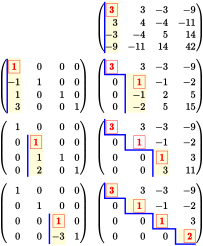

In [32]:
Random.seed!(4105)

L,D,A=gen_ldlt_pb(4)
matrices,_,desc  = reduce_to_ref( A )

pivot_list, bg_for_entries, ref_path_list = decorate_ge(desc,1:size(A,1),size(A))

h,m = nM.ge(to_latex(matrices), formater=x->x,
            pivot_list     = pivot_list,
            bg_for_entries = bg_for_entries,
            ref_path_list  = ref_path_list,
    tmp_dir="../../tmp", keep_file="../../tmp/foo")
h

In [33]:
L = inv( matrices[2][1] )
for i in 3:length(matrices)  L *= inv( matrices[i][1] ) end
D = Diagonal(matrices[end][end])
LDLt = L*D*L'
latexify( [ L', D, L,  LDLt ]')

"\\begin{equation}\n\\left[\n\\begin{array}{cccc}\n\\left[\n\\begin{array}{cccc}\n1 & 0 & 0 & 0 \\\\\n1 & 1 & 0 & 0 \\\\\n-1 & -1 & 1 & 0 \\\\\n-3 & -2 & 3 & 1 \\\\\n\\end{array}\n\\right] & \\left[\n\\begin{array}{cccc}\n3 & 0 & 0 & 0 \\\\\n0 & 1 & 0 & 0 \\\\\n0 & 0 & 1 & 0 \\\\\n0 & 0 & 0 & 2 \\\\\n\\end{array}" ⋯ 27 bytes ⋯ "ray}{cccc}\n1 & 1 & -1 & -3 \\\\\n0 & 1 & -1 & -2 \\\\\n0 & 0 & 1 & 3 \\\\\n0 & 0 & 0 & 1 \\\\\n\\end{array}\n\\right] & \\left[\n\\begin{array}{cccc}\n3 & 3 & -3 & -9 \\\\\n3 & 4 & -4 & -11 \\\\\n-3 & -4 & 5 & 14 \\\\\n-9 & -11 & 14 & 42 \\\\\n\\end{array}\n\\right] \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

#### **Cholesky Decomposition**

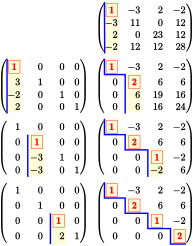

In [3]:
Random.seed!(41325)

L,D,A=gen_ldlt_pb(4)
matrices,_,desc  = reduce_to_ref( A )

pivot_list, bg_for_entries, ref_path_list = decorate_ge(desc,1:size(A,1),size(A))

h,m = nM.ge(to_latex(matrices), formater=x->x,
            pivot_list     = pivot_list,
            bg_for_entries = bg_for_entries,
            ref_path_list  = ref_path_list,
    tmp_dir="../../tmp", keep_file="../../tmp/foo")
h

In [7]:
L = inv( matrices[2][1] )
for i in 3:length(matrices)  L *= inv( matrices[i][1] ) end
D = Diagonal(matrices[end][end])
G = sqrt.(Sym.(D))*L'
GtG = G'G
latexify( [G',G, GtG']' )

L"\begin{equation}
\left[
\begin{array}{ccc}
\left[
\begin{array}{cccc}
1 & -3 & 2 & -2 \\
0 & \sqrt{2} & 3 \cdot \sqrt{2} & 3 \cdot \sqrt{2} \\
0 & 0 & 1 & -2 \\
0 & 0 & 0 & \sqrt{2} \\
\end{array}
\right] & \left[
\begin{array}{cccc}
1 & 0 & 0 & 0 \\
-3 & \sqrt{2} & 0 & 0 \\
2 & 3 \cdot \sqrt{2} & 1 & 0 \\
-2 & 3 \cdot \sqrt{2} & -2 & \sqrt{2} \\
\end{array}
\right] & \left[
\begin{array}{cccc}
1 & -3 & 2 & -2 \\
-3 & 11 & 0 & 12 \\
2 & 0 & 23 & 12 \\
-2 & 12 & 12 & 28 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

#### **PLU Problem**

Reverting Windows console CPs to (in,out) = (437,437)


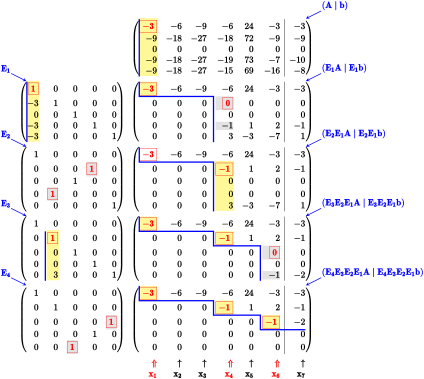

In [36]:
Random.seed!(4005)

pivot_cols,P,U,A=gen_plu_pb(5,7,3)
matrices,pivot_cols,desc  = reduce_to_ref( A )

pivot_list, bg_for_entries, ref_path_list, basic_var = decorate_ge(desc,pivot_cols,size(A); pivot_color="yellow!40");
#println.(bg_for_entries)

h,m=nM.ge( to_latex(matrices), formater=x->x, Nrhs=1,
           fig_scale=0.9,
           pivot_list       = pivot_list, pivot_text_color="red", variable_colors=["red", "black"],
           bg_for_entries   = bg_for_entries,
           ref_path_list    = ref_path_list,
           variable_summary = basic_var,
           array_names=["E", ["A", "b"]],
           tmp_dir="../../tmp", keep_file="../../tmp/bah")
h

# 3. Normal Equation, QR Type Problems

## 3.1 Orthogonal Matrices

In [37]:
Random.seed!(27)

c,mat = W_2_matrix()
latexify( [mat, mat'mat//(c*c) ])

L"\begin{equation}
\left[
\begin{array}{c}
\left[
\begin{array}{cc}
5 & -12 \\
12 & 5 \\
\end{array}
\right] \\
\left[
\begin{array}{cc}
1 & 0 \\
0 & 1 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [38]:
Random.seed!(27)

m=Q_2_matrix()
latexify( [m, m'm])

L"\begin{equation}
\left[
\begin{array}{c}
\left[
\begin{array}{cc}
\frac{5}{13} & \frac{-12}{13} \\
\frac{12}{13} & \frac{5}{13} \\
\end{array}
\right] \\
\left[
\begin{array}{cc}
1 & 0 \\
0 & 1 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [39]:
Random.seed!(28)
c,m=W_3_matrix()
latexify(m)

L"\begin{equation}
\left[
\begin{array}{ccc}
-2 & 0 & 0 \\
0 & 15 & -112 \\
0 & 112 & 15 \\
\end{array}
\right]
\end{equation}
"

In [40]:
Random.seed!(28)
m = Q_3_matrix()
latexify( [m, m'm] )

L"\begin{equation}
\left[
\begin{array}{c}
\left[
\begin{array}{ccc}
0 & \frac{-112}{113} & \frac{15}{113} \\
0 & \frac{15}{113} & \frac{112}{113} \\
1 & 0 & 0 \\
\end{array}
\right] \\
\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [41]:
Random.seed!(28)
m = Q_4_blocks()
latexify( [m, m'm] )

L"\begin{equation}
\left[
\begin{array}{c}
\left[
\begin{array}{cccc}
\frac{24}{25} & 0 & 0 & \frac{7}{25} \\
\frac{7}{25} & 0 & 0 & \frac{-24}{25} \\
0 & \frac{-112}{113} & \frac{15}{113} & 0 \\
0 & \frac{15}{113} & \frac{112}{113} & 0 \\
\end{array}
\right] \\
\left[
\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [42]:
Random.seed!(288)
c,m,den = W_4_matrix()
latexify( [m, m'm//(c*c)] )

L"\begin{equation}
\left[
\begin{array}{c}
\left[
\begin{array}{cccc}
13 & 6 & 0 & 18 \\
-18 & 0 & 6 & 13 \\
0 & -18 & -13 & 6 \\
6 & -13 & 18 & 0 \\
\end{array}
\right] \\
\left[
\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [43]:
Random.seed!(388)
m=Q_4_matrix()

latexify([m,m'm])

L"\begin{equation}
\left[
\begin{array}{c}
\left[
\begin{array}{cccc}
\frac{2}{27} & \frac{10}{27} & 0 & \frac{25}{27} \\
\frac{-25}{27} & 0 & \frac{-10}{27} & \frac{2}{27} \\
0 & \frac{-25}{27} & \frac{2}{27} & \frac{10}{27} \\
\frac{-10}{27} & \frac{2}{27} & \frac{25}{27} & 0 \\
\end{array}
\right] \\
\left[
\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [44]:
Random.seed!(388)
m4=Q_matrix(4)
m5=Q_matrix(5)

latexify([[m4',(m4'm4)']', [m5', (m5'm5)']'])

"\\begin{equation}\n\\left[\n\\begin{array}{c}\n\\left[\n\\begin{array}{cc}\n\\left[\n\\begin{array}{cccc}\n\\frac{115}{129} & \\frac{-6}{43} & \\frac{44}{129} & \\frac{34}{129} \\\\\n\\frac{34}{129} & \\frac{33}{43} & \\frac{-70}{129} & \\frac{28}{129} \\\\\n\\frac{-44}{129} & \\frac{18}{43} & \\frac{" ⋯ 715 bytes ⋯ "rac{-102}{203} & \\frac{24}{29} \\\\\n\\end{array}\n\\right] & \\left[\n\\begin{array}{ccccc}\n1 & 0 & 0 & 0 & 0 \\\\\n0 & 1 & 0 & 0 & 0 \\\\\n0 & 0 & 1 & 0 & 0 \\\\\n0 & 0 & 0 & 1 & 0 \\\\\n0 & 0 & 0 & 0 & 1 \\\\\n\\end{array}\n\\right] \\\\\n\\end{array}\n\\right] \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

In [45]:
Random.seed!(388)
m=sparse_Q_matrix((1,1,3))
latexify( [m, m'm] )

L"\begin{equation}
\left[
\begin{array}{c}
\left[
\begin{array}{ccccc}
\frac{3}{23} & 0 & \frac{14}{23} & 0 & \frac{-18}{23} \\
\frac{-6}{23} & 0 & \frac{18}{23} & 0 & \frac{13}{23} \\
0 & 0 & 0 & -1 & 0 \\
0 & -1 & 0 & 0 & 0 \\
\frac{22}{23} & 0 & \frac{3}{23} & 0 & \frac{6}{23} \\
\end{array}
\right] \\
\left[
\begin{array}{ccccc}
1 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [46]:
Random.seed!(388)
c,m=sparse_W_matrix((1,1,3))
latexify( [m, m'm//(c*c)]  )

L"\begin{equation}
\left[
\begin{array}{c}
\left[
\begin{array}{ccccc}
3 & 0 & 14 & 0 & -18 \\
-6 & 0 & 18 & 0 & 13 \\
0 & 0 & 0 & -23 & 0 \\
0 & -23 & 0 & 0 & 0 \\
22 & 0 & 3 & 0 & 6 \\
\end{array}
\right] \\
\left[
\begin{array}{ccccc}
1 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [47]:
Random.seed!(388)
m = W_matrix(5)
latexify([m, m'm])

L"\begin{equation}
\left[
\begin{array}{c}
\left[
\begin{array}{ccccc}
16 & -11 & 38 & -18 & -8 \\
9 & 32 & -8 & -16 & -28 \\
8 & 18 & 19 & 38 & -4 \\
-28 & -16 & 4 & 8 & -33 \\
-32 & 22 & 18 & -11 & 16 \\
\end{array}
\right] \\
\left[
\begin{array}{ccccc}
2209 & 0 & 0 & 0 & 0 \\
0 & 2209 & 0 & 0 & 0 \\
0 & 0 & 2209 & 0 & 0 \\
0 & 0 & 0 & 2209 & 0 \\
0 & 0 & 0 & 0 & 2209 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

## 3.2 Normal Equation and QR Problems

### 3.2.1 Projection Matrix

In [48]:
A =  gen_full_col_rank_matrix( (1,1,2),3; maxint=2 )
P = ca_projection_matrix( A )
d,Pint = factor_out_denominator( P )
latexify([[1//d, Pint']', A']')

L"\begin{equation}
\left[
\begin{array}{cc}
\left[
\begin{array}{c}
\frac{1}{75} \\
\left[
\begin{array}{cccc}
59 & 20 & -12 & 20 \\
20 & 50 & 15 & -25 \\
-12 & 15 & 66 & 15 \\
20 & -25 & 15 & 50 \\
\end{array}
\right] \\
\end{array}
\right] & \left[
\begin{array}{ccc}
\frac{-1}{5} & 0 & \frac{4}{5} \\
-1 & 2 & 1 \\
\frac{-7}{5} & 0 & \frac{3}{5} \\
0 & -2 & 0 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [49]:
latexify([gen_qr_problem(4;maxint=2)', gen_qr_problem_3(maxint=2)', gen_qr_problem_4(maxint=2)']')

L"$\left[
\begin{array}{ccc}
\left[
\begin{array}{cccc}
-1 & 2 & 0 & -2 \\
-1 & 2 & 2 & 0 \\
1 & 0 & -2 & 2 \\
1 & 0 & -4 & -4 \\
\end{array}
\right] & \left[
\begin{array}{ccc}
-35 & -35 & -23 \\
12 & 12 & 47 \\
0 & -1 & 1 \\
\end{array}
\right] & \left[
\begin{array}{cccc}
-6 & -24 & -6 & -17 \\
0 & 1 & 7 & 25 \\
1 & 1 & -20 & -12 \\
18 & 12 & -41 & -5 \\
\end{array}
\right] \\
\end{array}
\right]$"

### 3.2.2 QR Problems

Reverting Windows console CPs to (in,out) = (437,437)


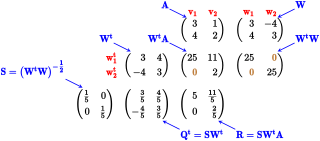

In [50]:
A=[3 1; 4 2]
W   = gram_schmidt_w(A)
h,m = nM.gram_schmidt_qr(A, W, tmp_dir="../../tmp")
h

Reverting Windows console CPs to (in,out) = (437,437)


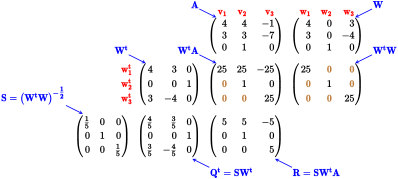

In [51]:
A   = gen_qr_problem_3(maxint=1)
W   = gram_schmidt_w(A)
h,m = nM.gram_schmidt_qr(A, W, tmp_dir="../../tmp")
h

Reverting Windows console CPs to (in,out) = (437,437)


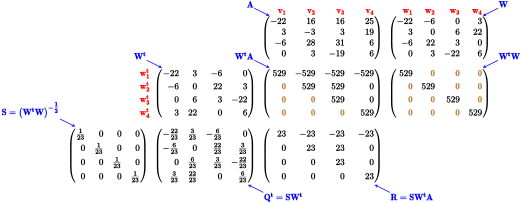

In [52]:
A   = gen_qr_problem_4(maxint=1)
W   = gram_schmidt_w(A)
h,m = nM.gram_schmidt_qr(A, W, tmp_dir="../../tmp", fig_scale=0.9)
h

Reverting Windows console CPs to (in,out) = (437,437)


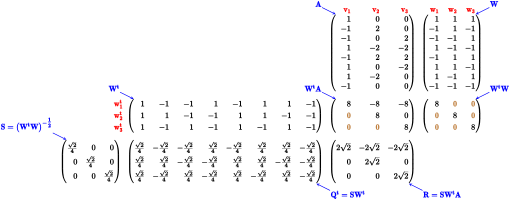

In [53]:
A   = gen_qr_problem(8, maxint=1)
W   = gram_schmidt_w(A[:,1:3])
h,m = nM.gram_schmidt_qr(A[:,1:3], W, fig_scale=0.8, tmp_dir="../../tmp")
h

# 4. Eigenproblems

Reverting Windows console CPs to (in,out) = (437,437)


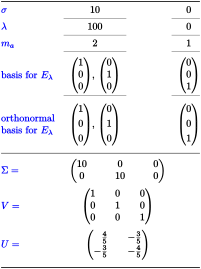

In [54]:
A =[8 -6 0; -6 -8 0]
nM.show_svd_table(A, Ascale=1, mmS=7, mmLambda=10, tmp_dir="../../tmp")

L"\begin{equation}
\left[
\begin{array}{c}
\left[
\begin{array}{ccc}
2 & 0 & -1 \\
1 & 1 & -1 \\
0 & 0 & 1 \\
\end{array}
\right] \\
\left[
\begin{array}{ccc}
1 & -1 & -1 \\
-1 & 2 & -1 \\
1 & -1 & 0 \\
\end{array}
\right] \\
\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 2 \\
\end{array}
\right] \\
\left[
\begin{array}{ccc}
-1 & 1 & 3 \\
-1 & 1 & 2 \\
-1 & 0 & 1 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

Reverting Windows console CPs to (in,out) = (437,437)


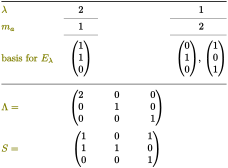

In [55]:
S,Λ,Sinv,A=gen_eigenproblem([1,1,2])
display(latexify([A, S, Λ, Sinv ]))
nM.show_eig_tbl(A,fig_scale=1, mmLambda=11, color="Olive", tmp_dir="../../tmp" )

L"\begin{equation}
\left[
\begin{array}{c}
\left[
\begin{array}{ccc}
\frac{225}{12769} & 0 & \frac{-1680}{12769} \\
0 & 1 & 0 \\
\frac{-1680}{12769} & 0 & \frac{12544}{12769} \\
\end{array}
\right] \\
\left[
\begin{array}{ccc}
0 & \frac{15}{113} & \frac{112}{113} \\
1 & 0 & 0 \\
0 & \frac{-112}{113} & \frac{15}{113} \\
\end{array}
\right] \\
\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

Reverting Windows console CPs to (in,out) = (437,437)


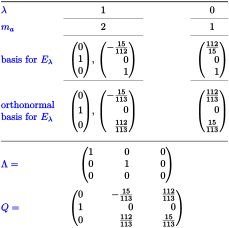

In [56]:
S,Λ,A=gen_symmetric_eigenproblem([1,1,0], maxint=2)
display(latexify([A,S,Λ]))

d,A_=factor_out_denominator(A)
nM.show_eig_tbl(A_,Ascale=d,normal=true, fig_scale=1, mmLambda=11, color="blue", tmp_dir="../../tmp")

L"\begin{equation}
\left[
\begin{array}{c}
\left[
\begin{array}{ccc}
-8 & -3 & -1 \\
-4 & 0 & 0 \\
112 & 36 & 12 \\
\end{array}
\right] \\
\left[
\begin{array}{ccc}
1 & 0 & \frac{1}{4} \\
0 & 1 & \frac{-1}{2} \\
0 & 0 & 0 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

Reverting Windows console CPs to (in,out) = (437,437)


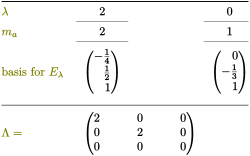

In [57]:
A=Rational{Int64}.(gen_non_diagonalizable_eigenproblem(2,0))
display(latexify([ A, rref(A-2I)] ))
nM.show_eig_tbl(Int.(A),fig_scale=1.2, mmLambda=11, color="Olive", tmp_dir="../../tmp" )

"\$\\left[\n\\begin{array}{c}\n\\left[\n\\begin{array}{ccccc}\n\\frac{-12}{49} & \\frac{4}{7} & \\frac{18}{49} & 0 & \\frac{-36}{49} \\\\\n\\frac{-8}{49} & \\frac{12}{7} & \\frac{12}{49} & 0 & \\frac{-24}{49} \\\\\n\\frac{-24}{49} & \\frac{-6}{7} & \\frac{36}{49} & 0 & \\frac{-72}{49} \\\\\n\\end{array" ⋯ 310 bytes ⋯ "left[\n\\begin{array}{ccccc}\n0 & -1 & 0 & 0 & 0 \\\\\n\\frac{-2}{7} & 0 & \\frac{3}{7} & 0 & \\frac{-6}{7} \\\\\n\\frac{3}{7} & 0 & \\frac{6}{7} & 0 & \\frac{2}{7} \\\\\n0 & 0 & 0 & 1 & 0 \\\\\n\\frac{6}{7} & 0 & \\frac{-2}{7} & 0 & \\frac{-3}{7} \\\\\n\\end{array}\n\\right] \\\\\n\\end{array}\n\\right]\$"

Reverting Windows console CPs to (in,out) = (437,437)


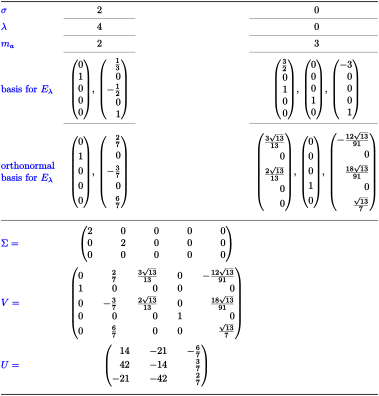

In [58]:
U,Σ,Vt,A = gen_svd_problem(3,[3,2],  [2,2],  maxint=2)
display( latexify([A,U,Σ,Vt]))

d,intA=factor_out_denominator(A)
nM.show_svd_table(intA, Ascale=d, mmS=7, mmLambda=10, tmp_dir="../../tmp")

# 5. WORK

In [2]:
Random.seed!(4122);

In [4]:
pivot_cols,P,L,U,A=gen_plu_pb(4,4,4); X,B=gen_rhs(A,pivot_cols;maxint=5); b1 = A*[3;-1;1;0]
@show P*L*U == A
print("A,X,B=")
latexify([A',X',B']')

P * L * U == A = true
A,X,B=

L"\begin{equation}
\left[
\begin{array}{ccc}
\left[
\begin{array}{cccc}
-2 & 0 & 2 & 2 \\
-4 & 3 & 7 & 7 \\
-2 & 3 & 8 & 8 \\
0 & -6 & 3 & 2 \\
\end{array}
\right] & \left[
\begin{array}{c}
5 \\
3 \\
5 \\
-5 \\
\end{array}
\right] & \left[
\begin{array}{c}
-10 \\
-11 \\
-1 \\
-13 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [4]:
print("P,L,U=")
latexify([P',L',U']')

P,L,U=

L"\begin{equation}
\left[
\begin{array}{ccc}
\left[
\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{array}
\right] & \left[
\begin{array}{cccc}
1 & 0 & 0 & 0 \\
-1 & 1 & 0 & 0 \\
2 & 2 & 1 & 0 \\
3 & -2 & -1 & 1 \\
\end{array}
\right] & \left[
\begin{array}{cccc}
-2 & 2 & 0 & -2 \\
0 & 2 & -2 & -2 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -2 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

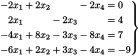

In [5]:
pb = ShowGe{Rational{Int}}( A, [B b1] );
show_system(pb; b_col=1)                  # show the system

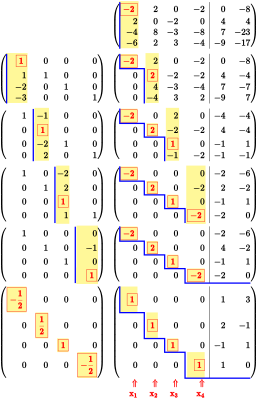

In [6]:
ref!(pb; gj=true)                         # reduce it to row echelon form
show_layout!(pb)                          # show the layout of the computation given the ref!() computation

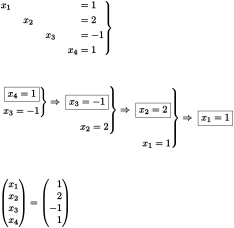

In [7]:
show_backsubstitution!(pb; b_col=1)        # show backsubstitution given the ref!() computation

# NEW CODE

In [63]:
function ge( matrices, desc, pivot_cols; Nrhs=0, formater=to_latex, pivot_list=nothing, bg_for_entries=nothing,
             variable_colors=["blue","black"], pivot_colors=["blue","yellow!40"],
             ref_path_list=nothing, comment_list=[], variable_summary=nothing, array_names=nothing,
             start_index=1, func=nothing, fig_scale=nothing, tmp_dir=nothing, keep_file=nothing )

    M = size(matrices[1][end],1)
    N = size(matrices[1][end],2)-Nrhs

    pivot_list, bg_for_entries, ref_path_list, variable_summary = decorate_ge(desc, pivot_cols, (M,N); pivot_color=pivot_colors[2]);

    h,m=nM.ge( formater(matrices), formater=x->x, Nrhs=Nrhs,
               pivot_list       = pivot_list,
               bg_for_entries   = bg_for_entries,
               variable_colors  = variable_colors,pivot_text_color=pivot_colors[1],
               ref_path_list    = ref_path_list, comment_list=comment_list,
               variable_summary = variable_summary,
               array_names      = array_names,
               start_index      = start_index,
               func             = func,
               fig_scale        = fig_scale,
               tmp_dir          = tmp_dir, keep_file=keep_file    )
    h,m
end;

In [64]:
A=[  0   0   0   0   0    0   0    0
  0   0   0   0   2   -4   2    6
  0   0   0   0   6  -12   6   16
  1  -4  -1   2   3   -7  -6    3
 -3  12   3  -6  -9   21  18  -21]

B = [0;-10;-26;-2;30];

Reverting Windows console CPs to (in,out) = (437,437)


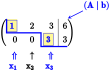

In [65]:
M=2
N=3
r=2
Nrhs=1

A=[1 2 3; 0 0 3]; B=[6;3]
#pivot_cols,P,L,U,A=gen_plu_pb(M,N,r); X,B=gen_rhs(A,pivot_cols;maxint=2,num_rhs=Nrhs)
matrices, pivot_cols, desc = reduce_to_ref( [A B], gj=false )

h,_=ge(matrices, desc, pivot_cols;Nrhs=Nrhs,array_names=["E", ["A", "b"]], fig_scale=0.9, tmp_dir="../../tmp", keep_file="../../tmp/foo")
h

# TESTS

#### Generate Matrix

In [8]:
M=6; N=6; r=3

A,X,B = gen_gj_pb(M,N,r; maxint=2, pivot_in_first_col=false, num_rhs=1,has_zeros=true)
pivot_cols,P,L,U,A=gen_plu_pb(M,N,r)
A[1,1]=0

Nrhs = M
matrices, pivot_cols, desc= reduce_to_ref( Rational{Int}.([A I]); n=N, gj=false );

pivot_list, bg_for_entries, ref_path_list = decorate_ge(desc, pivot_cols, (M,N));
println("number of layers: $(length(matrices))")
latexify([A', matrices[end][end]']' )

number of layers: 5


"\\begin{equation}\n\\left[\n\\begin{array}{cc}\n\\left[\n\\begin{array}{cccccc}\n0 & 0 & 0 & 0 & 0 & 0 \\\\\n0 & 0 & 0 & 0 & 0 & 0 \\\\\n0 & 0 & 0 & 0 & 0 & 0 \\\\\n0 & 0 & 0 & -3 & -6 & 6 \\\\\n-2 & -6 & -4 & 8 & 24 & -24 \\\\\n0 & 0 & 0 & -3 & -6 & 5 \\\\\n\\end{array}\n\\right] & \\left[\n\\begin{arra" ⋯ 109 bytes ⋯ " 1 & 0 & 0 \\\\\n0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & -1 & 0 & 1 \\\\\n0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\\\\n0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\\\\n0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\\\\n\\end{array}\n\\right] \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

In [9]:
pivot_list, bg_for_entries, ref_path_list, variable_summary = decorate_ge(desc, pivot_cols, (M,N));

println( "num_levels = $(length(matrices))")
for k in desc println( k ) end
if false
    println("===================================")
    println("pivot_list")
    for k in pivot_list println(".  $k") end
end
if false
    println("===================================")
    println("bg_list")
    for k in bg_for_entries println(".  $k") end
end
if false
    println("===================================")
    println("ref_path_list")
    for k in ref_path_list println(".  $k") end
end

num_levels = 5
GenLinAlgProblems.RequireRowExchange(0, 1, 5, 1, 1, [1])
GenLinAlgProblems.DoRowExchange(1, 1, 5, 1, 1)
GenLinAlgProblems.FoundPivot(1, 1, 5, 1, 1, [1])
GenLinAlgProblems.RequireElimination(1, false, false, 1, 1, 1, [1])
GenLinAlgProblems.RequireRowExchange(1, 2, 4, 4, 2, [1, 4])
GenLinAlgProblems.DoRowExchange(2, 2, 4, 4, 2)
GenLinAlgProblems.FoundPivot(2, 2, 4, 4, 2, [1, 4])
GenLinAlgProblems.RequireElimination(2, false, true, 2, 4, 2, [1, 4])
GenLinAlgProblems.DoElimination(3, 2, 4, false)
GenLinAlgProblems.RequireRowExchange(3, 3, 6, 6, 3, [1, 4, 6])
GenLinAlgProblems.DoRowExchange(4, 3, 6, 6, 3)
GenLinAlgProblems.FoundPivot(4, 3, 6, 6, 3, [1, 4, 6])
GenLinAlgProblems.RequireElimination(4, false, false, 3, 6, 3, [1, 4, 6])
GenLinAlgProblems.Finished(4, [1, 4, 6])


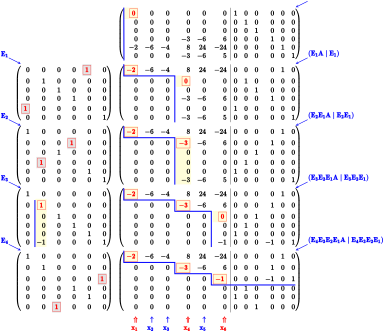

In [10]:
h,m = nM.ge(to_latex(matrices), formater=x->x, Nrhs=Nrhs, tmp_dir="../../tmp",
            pivot_list       = pivot_list,
            ref_path_list    = ref_path_list,
            bg_for_entries   = bg_for_entries,
            array_names      = [ "E", ["A", "I"]],
            variable_summary = variable_summary,
    fig_scale=0.7
)
h

#### Specify matrix

In [69]:
A

2×3 Matrix{Int64}:
 1  2  3
 0  0  3

In [70]:
if true
    M=6;N=6;r=3
    A=[0  0   0   0  0   0
       0  0   0   0  0   0
       0  0   0   0  0   0
       0  0   0   0  1   1
       0  0   0   0  1   2
      -3  3  -9  -6  8  -7]
    A    = Rational{Int}.([A I])
    Nrhs = M
elseif false
    M=3; N=6; r=3
    A=[2 -1 -2  1  0 -2;
       4 -2 -4  2 -2 -3;
      -4  2  4 -2  0  4]
    A    = Rational{Int}.([A I])
    Nrhs = M
else
    M=3; N=6; r=3
    A=[0I(M) zeros(Int,M,N-M)]; A[2,3]=2
    A    = Rational{Int}.([A I])
    Nrhs = M
end

matrices, pivot_cols, desc= reduce_to_ref( A; n=N, gj=true );
pivot_list, bg_for_entries, ref_path_list, variable_summary = decorate_ge(desc, pivot_cols, (M,N));

println("number of layers: $(length(matrices))")
display(latexify((to_latex(matrices[end][end]))))


println( "num_levels = $(length(matrices))")
for k in desc println( k ) end
if false
    println("===================================")
    println("pivot_list")
    for k in pivot_list println(".  $k") end
end
if true
    println("===================================")
    println("bg_list")
    for k in bg_for_entries println(".  $k") end
end
if false
    println("===================================")
    println("ref_path_list")
    for k in ref_path_list println(".  $k") end
end

number of layers: 7


L"\begin{equation}
\left[
\begin{array}{cccccccccccc}
1 & -1 & 3 & 2 & 0 & 0 & 0 & 0 & 0 & \frac{23}{3} & -5 & \frac{-1}{3} \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 2 & -1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & -1 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
\end{array}
\right]
\end{equation}
"

num_levels = 7
GenLinAlgProblems.RequireRowExchange(0, 1, 6, 1, 1, [1])
GenLinAlgProblems.DoRowExchange(1, 1, 6, 1, 1)
GenLinAlgProblems.FoundPivot(1, 1, 6, 1, 1, [1])
GenLinAlgProblems.RequireElimination(1, true, false, 1, 1, 1, [1])
GenLinAlgProblems.RequireRowExchange(1, 2, 4, 5, 2, [1, 5])
GenLinAlgProblems.DoRowExchange(2, 2, 4, 5, 2)
GenLinAlgProblems.FoundPivot(2, 2, 4, 5, 2, [1, 5])
GenLinAlgProblems.RequireElimination(2, true, true, 2, 5, 2, [1, 5])
GenLinAlgProblems.DoElimination(3, 2, 5, true)
GenLinAlgProblems.RequireRowExchange(3, 3, 5, 6, 3, [1, 5, 6])
GenLinAlgProblems.DoRowExchange(4, 3, 5, 6, 3)
GenLinAlgProblems.FoundPivot(4, 3, 5, 6, 3, [1, 5, 6])
GenLinAlgProblems.RequireElimination(4, true, true, 3, 6, 3, [1, 5, 6])
GenLinAlgProblems.DoElimination(5, 3, 6, true)
GenLinAlgProblems.RequireScaling(5, [1, 5, 6])
GenLinAlgProblems.DoScaling(6)
GenLinAlgProblems.Finished(6, [1, 5, 6])
bg_list
.  Vector{Any}[[3, 1, [(2, 5), (4, 5)], "gray!20"], [3, 1, [(0, 0), (1, 4)], "y

Reverting Windows console CPs to (in,out) = (437,437)


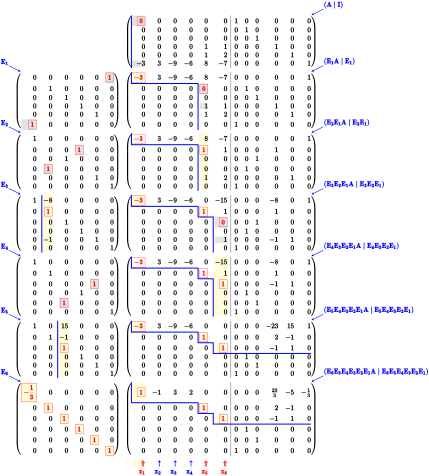

In [71]:
h,m = nM.ge(to_latex(matrices), formater=x->x, Nrhs=Nrhs, tmp_dir="../../tmp",
            pivot_list      = pivot_list,
            ref_path_list   = ref_path_list,
            bg_for_entries  = bg_for_entries,
            array_names     = [ "E", ["A", "I"]],
            variable_summary = variable_summary,
    fig_scale=0.7
)
h

In [17]:
function show_system(  pb::ShowGe{T}; b_col=1 )   where T <: Number
    println( "JL DBG show_system 1")
    cascade = nM.BacksubstitutionCascade( pb.A, pb.B[:,b_col] )
    cascade.show( pb.A, pb.B[:,b_col], show_system=true, show_cascade=false, tmp_dir=pb.tmp_dir, keep_file=pb.tmp_dir*"/show_system")
end
function show_system(  pb::ShowGe{Rational{T}}; b_col=1 )   where T <: Number
    println( "JL DBG show_system 2")
    cnv(x) = (numerator(x),denominator(x))
    A = cnv.(pb.A)
    b = cnv.(pb.B[:,b_col])
    display(A)   # JL DBG
    display(b)   # JL DBG
    cascade = nM.BacksubstitutionCascade( A, b )
    cascade.show( A, b, show_system=true, show_cascade=false, tmp_dir=pb.tmp_dir, keep_file=pb.tmp_dir*"/show_system")
end
function show_system(  pb::ShowGe{Complex{{Rational{T}}}; b_col=1 )   where T <: Number
    println( "JL DBG show_system 2")
    cnv(x) = (numerator(x),denominator(x))
    A = cnv.(pb.A)
    b = cnv.(pb.B[:,b_col])
    display(A)   # JL DBG
    display(b)   # JL DBG
    cascade = nM.BacksubstitutionCascade( A, b )
    cascade.show( A, b, show_system=true, show_cascade=false, tmp_dir=pb.tmp_dir, keep_file=pb.tmp_dir*"/show_system")
end

LoadError: UndefVarError: `ShowGe` not defined

In [12]:
typeof( (3_3im)//2 )

Complex{Rational{Int64}}